<div>
Olá, Georgia!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está excelente e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Análises robustas e detalhadas
- Boas práticas de programação
- Excelente organização do projeto e documentação dos experimentos
    
<br>
    
Deixei algumas sugestões em seu projeto, mas não são mandatórias. Você implementou as etapas necessárias para aprovação, mas leve essas sugestões como possíveis melhorias para projetos futuros.
   
<br>
    
Espero que você tenha uma jornada de muito aprendizado e te de desejo muito sucesso.
    
<br>
    
**Até breve!**

</div>


# Instrução do Projeto

A Film Junky Union, uma nova comunidade para entusiastas de filmes clássicos, está desenvolvendo um sistema para filtrar e categorizar resenhas de filmes. O objetivo é treinar um modelo para detectar automaticamente resenhas negativas. Você usará um conjunto de dados de resenhas de filmes do IMDB com rotulagem de polaridade para criar um modelo para classificar resenhas como positivas e negativas. Ele precisará ter um valor **F1 de pelo menos 0,85.**

## Inicialização

In [58]:
# Importando bibliotecas
import re
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import lightgbm as lgb

from tqdm.auto import tqdm

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# a próxima linha fornece gráficos de melhor qualidade em telas HiDPI
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [60]:
# isso é para usar progress_apply, leia mais em https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Carregar Dados

In [61]:
# Carregando arquivo externo de dados
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

In [62]:
# Conferindo estrutura básica do DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [63]:
# Visualizando uma amostra aleatória
df_reviews.sample(5, random_state=333)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
14975,tt0456554,movie,Grandma's Boy,Grandma's Boy,2006,\N,94,0,Comedy,7.0,76219,"First of all, I'd like to say that I really en...",4,neg,0,test,5802
9722,tt0099401,movie,Demon Wind,Demon Wind,1990,\N,96,0,Horror,5.0,2039,I swear I didn't mean to! I picked this out on...,4,neg,0,test,11407
4392,tt0364986,movie,Ben & Arthur,Ben & Arthur,2002,\N,85,0,"Drama,Romance,Thriller",2.3,7492,Ben & Arthur COULD have been a 10. Sam Mraovic...,1,neg,0,train,9156
36461,tt0377818,movie,The Dukes of Hazzard,The Dukes of Hazzard,2005,\N,104,0,Comedy,5.1,74497,I'm a huge fan of the Dukes of Hazzard TV show...,7,pos,1,train,10388
14,tt0217978,movie,'R Xmas,'R Xmas,2001,\N,85,0,"Crime,Drama,Thriller",5.8,1275,"Good actors, good director, well acted, well d...",3,neg,0,test,3578


In [64]:
# Conferindo as linhas com valores ausentes (NaNs)
df_reviews[df_reviews.isna().any(axis=1)]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [65]:
# Conferindo se há mais resenhas do filme com valores ausentes no DataFrame
df_reviews[df_reviews['original_title'] == 'Mila Ass Painting']

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [66]:
# Conferindo se há linhas duplicadas
df_reviews[df_reviews.duplicated()]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx


O conjunto de dados possui dados sobre títulos de filmes e programas de televisão, junto com as notas dadas pelo público em geral e pelo criador do comentário da amostra, o comentário a ser classificado pelo modelo e uma pré-rotulagem.

**Colunas:**
- `tconst`: Código do filme/programa de televisão sendo avaliado nesta amostra, tipo: *string*, sem valores ausentes;
- `title_type`: Tipo do título (se é filme ou um programa de televisão), tipo: *string*, sem valores ausentes;
- `primary_title`: Nome primário do título, tipo: *string*, sem valores ausentes;
- `original_title`: Nome original do título, tipo: *string*, sem valores ausentes;
- `start_year`: Ano de lançamento, tipo: *int*, sem valores ausentes;
- `end_year`: Ano de finalização (para programas de televisão), tipo: *string*, com valores ausentes que não precisarão ser tratados por não conter dados a serem analisados pelo modelo;
- `runtime_minutes`: Tempo de duração em minutos, tipo: *string*, com valores ausentes que não precisarão ser tratados por não conter dados a serem analisados pelo modelo;
- `is_adult`: Classificação indicativa do título (0 = não é adulto, 1 = é adulto), tipo: *int*, com valores ausentes que não precisarão ser tratados por não conter dados a serem analisados pelo modelo;
- `genres`: Gênero do título, tipo: *string*, com valores ausentes que não precisarão ser tratados por não conter dados a serem analisados pelo modelo;
- `average_rating`: Nota média de 0 a 10, tipo: *float*, com valores ausentes que não precisarão ser tratados por não conter dados a serem analisados pelo modelo;
- `votes`: Número de votos recebidos pelo título, tipo: *int*, com valores ausentes que não precisarão ser tratados por não conter dados a serem analisados pelo modelo;
- `review`: Resenhas a serem classificadas pelo modelo, tipo: *string*, sem valores ausentes, porém precisa de tratamento para ser avaliado pelo modelo de classificação de texto;
- `rating`: Nota individual daquela resenha ao título avaliado, tipo: *int*, sem valores ausentes;
- `sp`: Rotulagem das resenhas em texto (*pos* = positivo, *neg* = negativo), tipo: *string*, sem valores ausentes;
- `pos`: **Target**, rotulagem das resenhas (0 = negativo, 1 = positivo), tipo: *int*, sem valores ausentes;
- `ds_part`: Conjunto de dados ao qual pertence (treino ou teste), tipo: *string*, sem valores ausentes;
- `idx`: Índice da amostra no DataFrame original.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `sample()` foi utilizado para exibir uma amostra inicial dos seus dados
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- As conclusões foram apresentadas
</div>

## AED

Vamos verificar o número de filmes e resenhas ao longo dos anos.

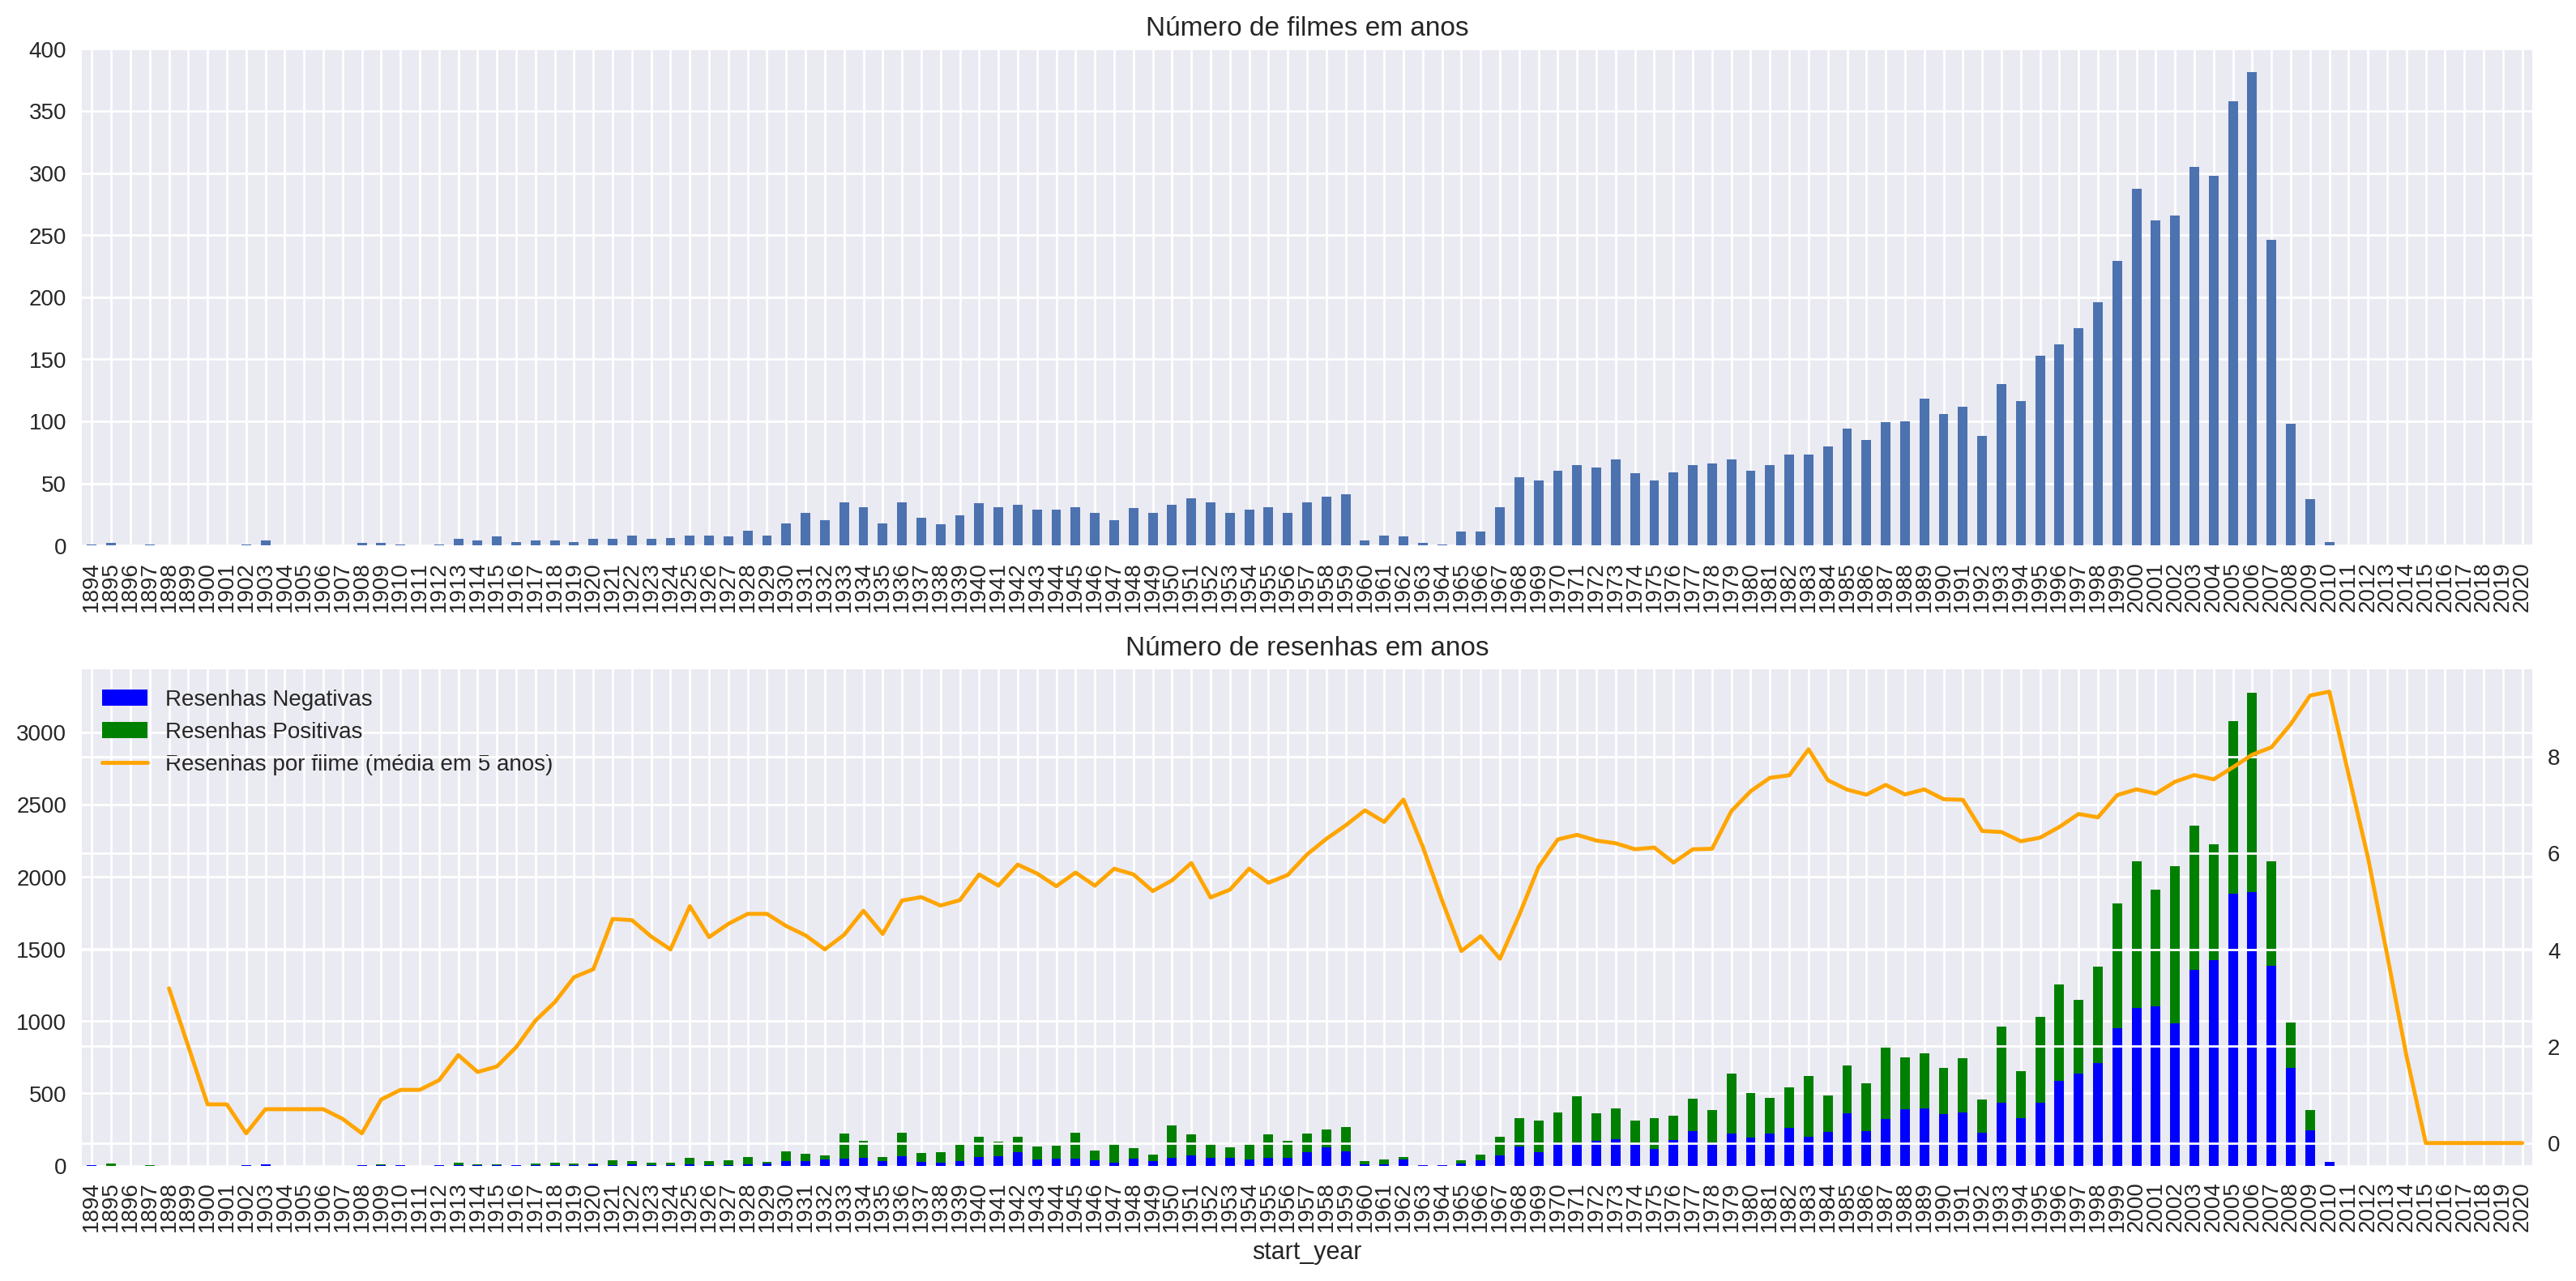

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de filmes em anos')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, color=['blue', 'green'], label=['Resenhas negativas', 'Resenhas Positivas'], ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='Resenhas por filme (média em 5 anos)', ax=axt)

# Captura elementos e rótulos do eixo principal (barras)
bar_handles, bar_labels = ax.get_legend_handles_labels()
bar_labels = ['Resenhas Negativas', 'Resenhas Positivas']

# Captura elementos e rótulos do eixo secundário (linha laranja)
line_handles, line_labels = axt.get_legend_handles_labels()

# Combina ambos
all_handles = bar_handles + line_handles
all_labels = bar_labels + line_labels

# Cria a legenda combinada
ax.legend(all_handles, all_labels, loc='upper left')

ax.set_title('Número de resenhas em anos')

fig.tight_layout()

- Há um aumento significativo do número de filmes lançados à partir de **1990**, com o conteúdo do DataFrame finalizando no ano de **2010**.

- O número de resenhas por filme, numa média de 5 anos, não é proporcional ao aumento do número de lançamentos, se mantém numa média acima de 4 resenhas para todos os filmes lançados desde **1921**, até há alguma variação conforme o número de lançamentos por ano porém não é proporcional às variações ocorridas.

- Para cada ano de lançamento de filmes há mais avaliações positivas do que negativas dos títulos lançados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição de resenhas ao longo dos anos foi analisada
- As conclusões foram apresentadas
</div>

Vamos verificar a distribuição do número de resenhas por filme com a contagem exata e o EDK (Estimativa de densidade kernel - só para saber como pode diferir da contagem exata)

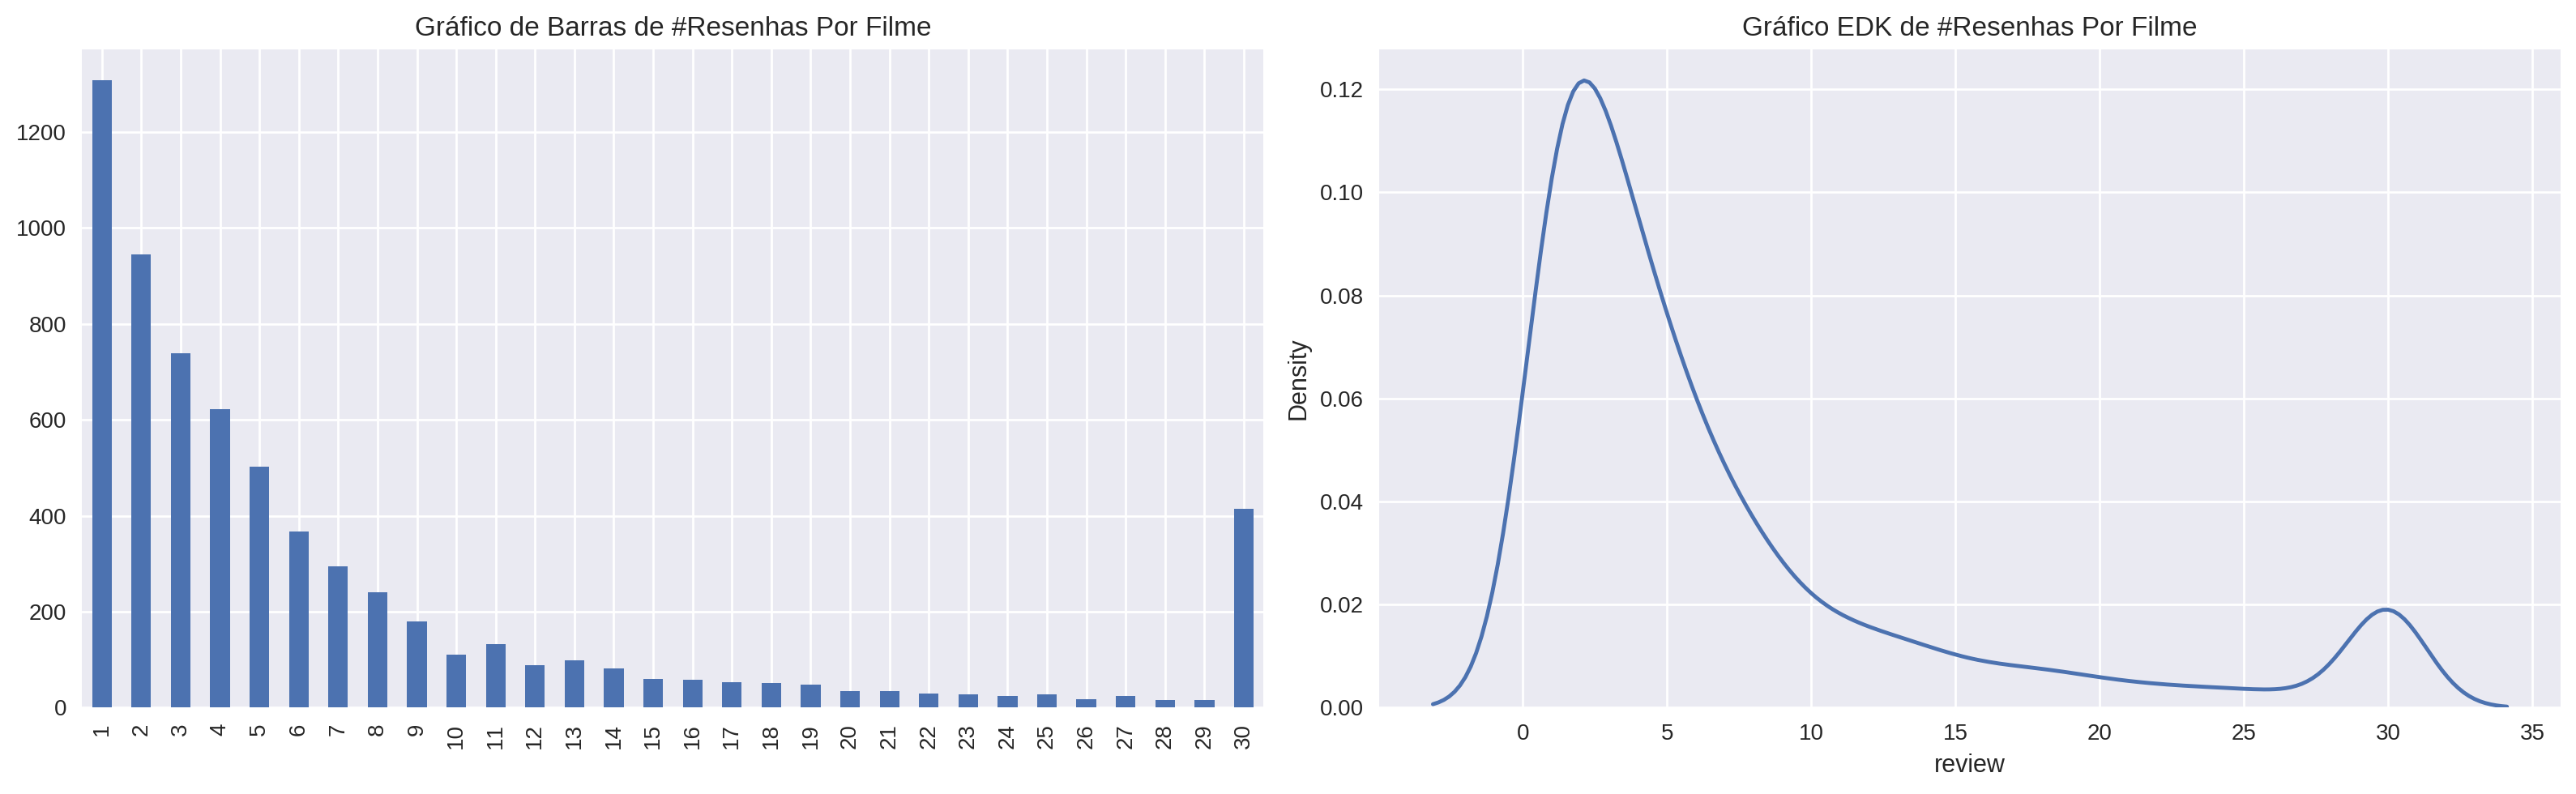

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de Barras de #Resenhas Por Filme')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico EDK de #Resenhas Por Filme')

fig.tight_layout()

- Não há muitos ruídos na distribuição de resenhas por filme, a grande maioria deles possui entre **1 e 5** resenhas e há um pequeno pico de cerca de 400 filmes com **30 resenhas ou mais**, provavelmente sucessos de bilheteria ou clássicos.

In [69]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

- A distribuição de classificação das resenhas é balanceada, sendo **49,9% Positivas** e **50,1 Negativas**.

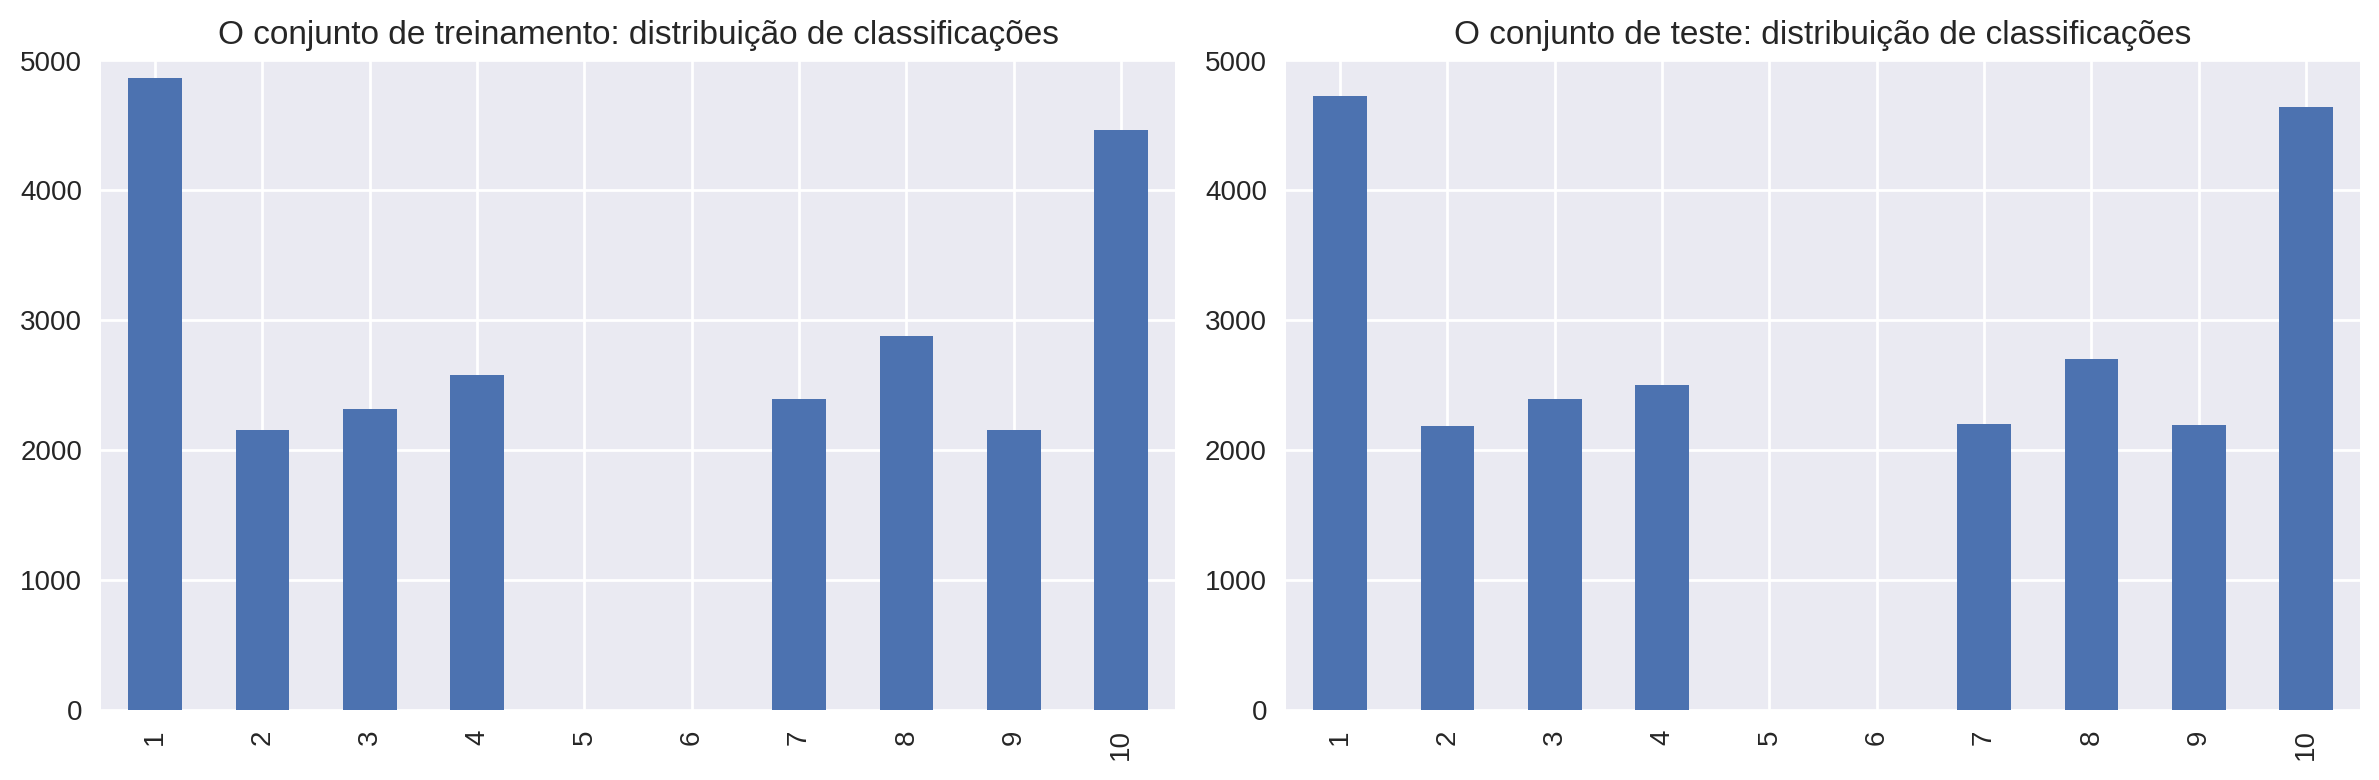

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('O conjunto de treinamento: distribuição de classificações')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('O conjunto de teste: distribuição de classificações')

fig.tight_layout()

- O trabalho de divisão dos conjuntos de treinamento e de teste foi muito bem feito mantendo-se a mesma distribuição de classificações para ambos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante analisou os dados dos conjuntos de treino e teste. É sempre importante fazer essa validação, pois a modelagem de Machine Learning assume que dados de teste (não usados no processo de treinamento) seguem a mesma distribuição dos dados usados para treinamento. Se essa premissa é violada, o modelo perde poder de generalização ao ser usado em dados reais
</div>

Distribuição de resenhas negativas e positivas ao longo dos anos para duas partes do conjunto de dados

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


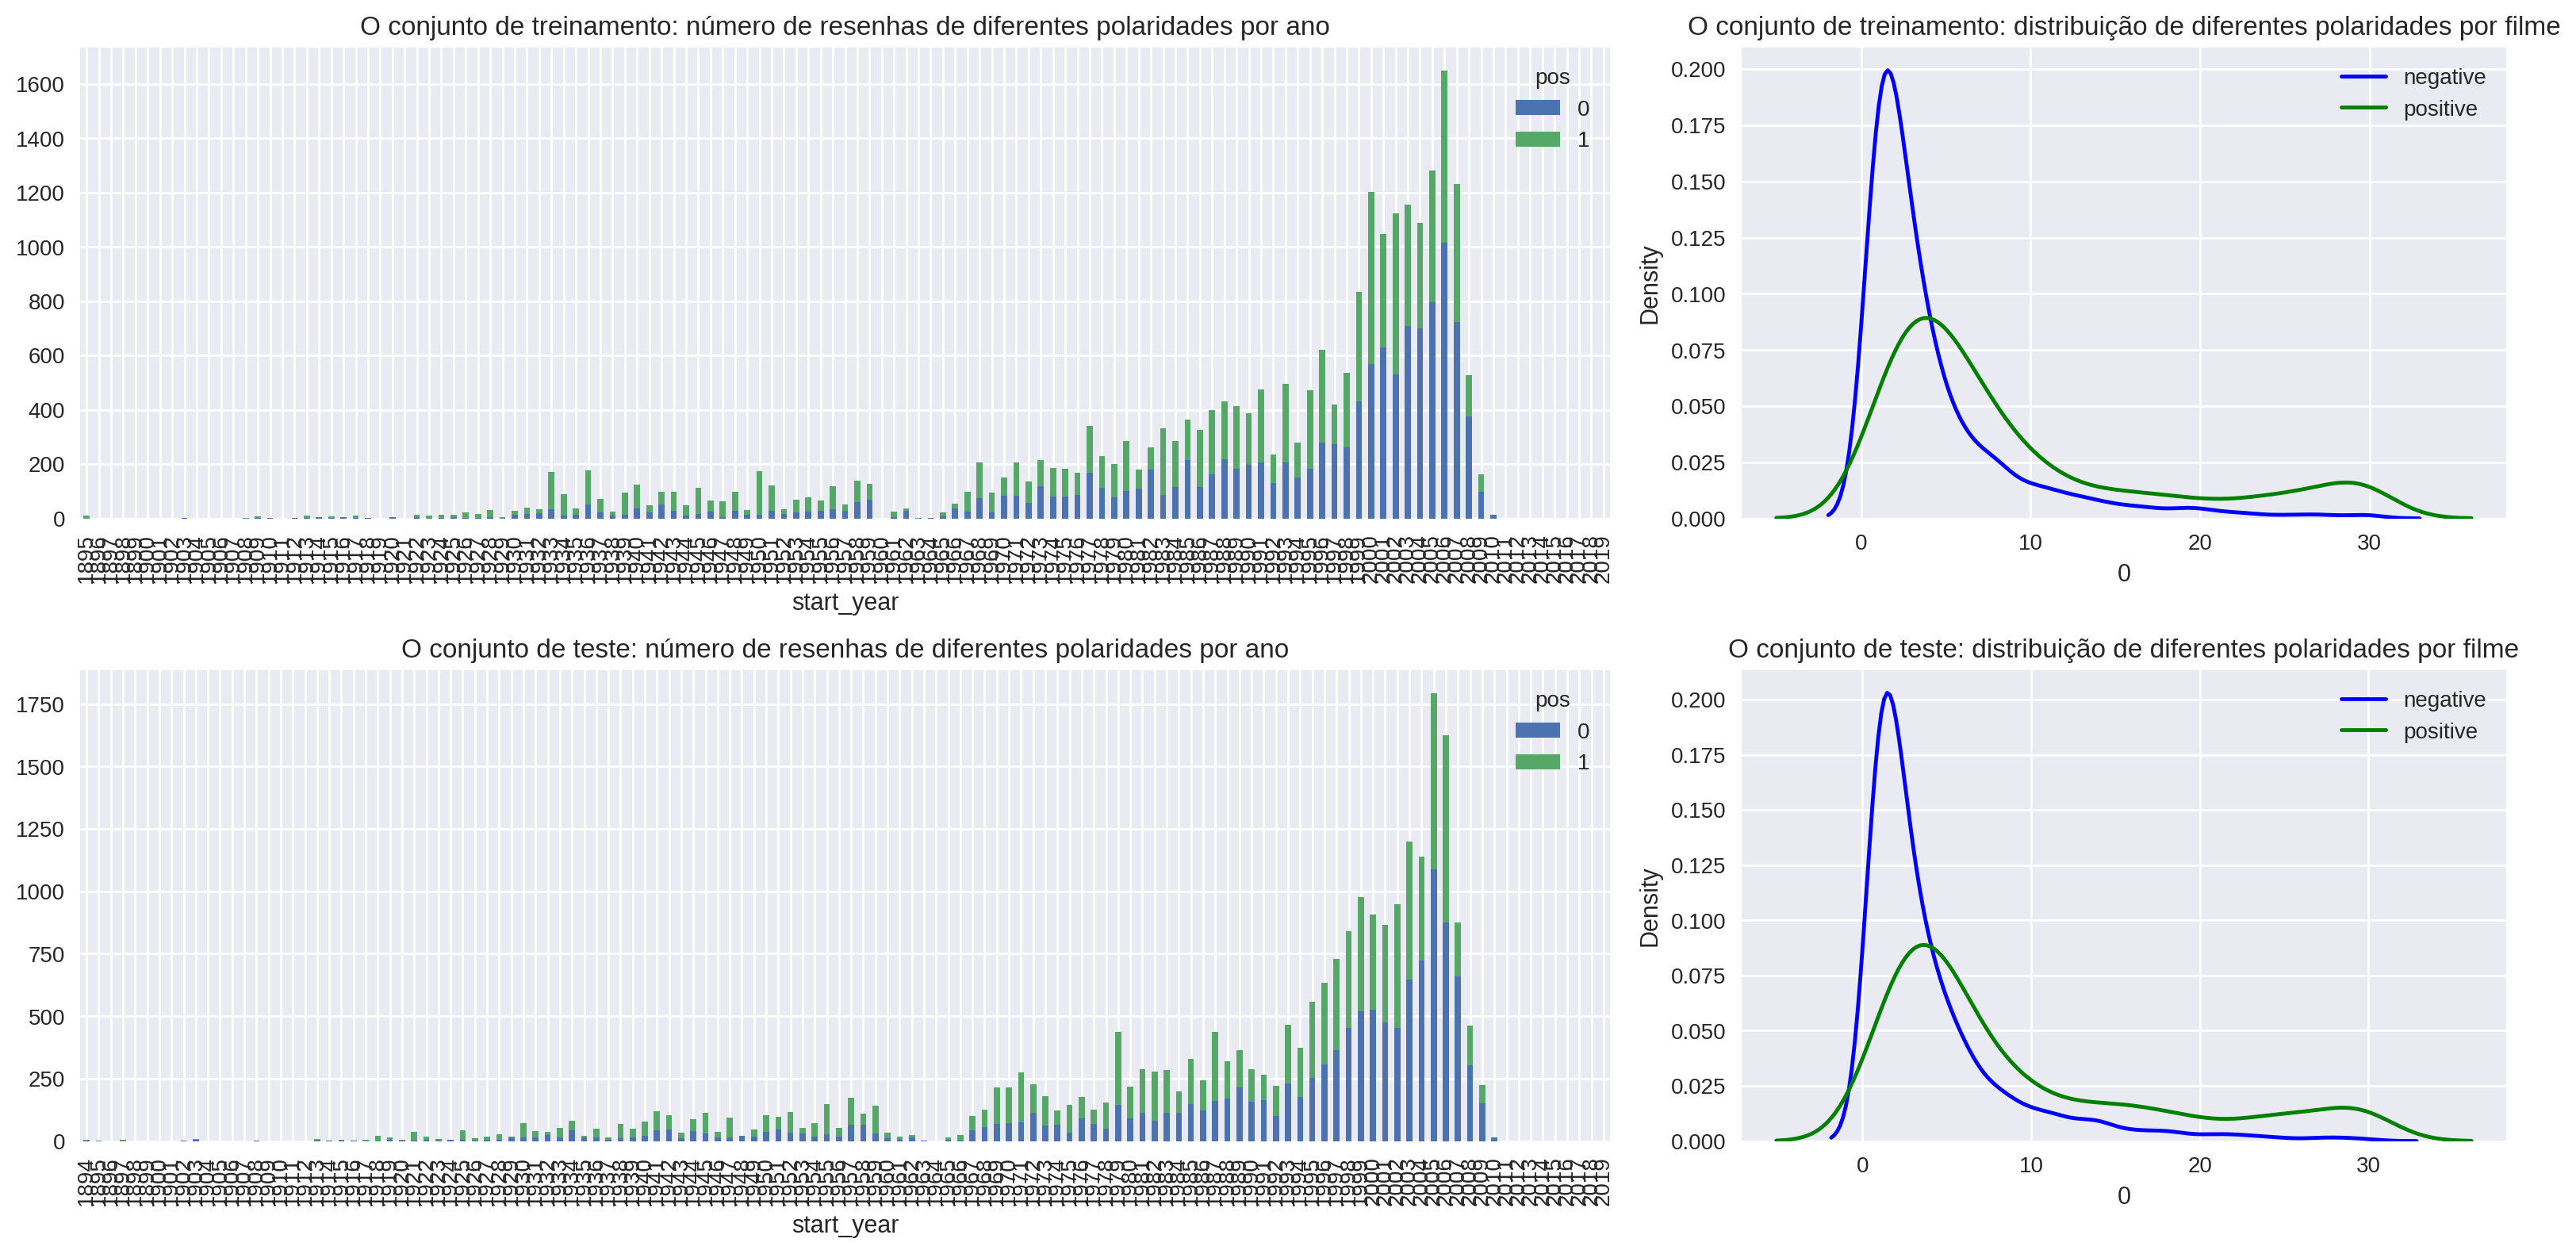

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('O conjunto de treinamento: número de resenhas de diferentes polaridades por ano')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('O conjunto de treinamento: distribuição de diferentes polaridades por filme')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('O conjunto de teste: número de resenhas de diferentes polaridades por ano')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('O conjunto de teste: distribuição de diferentes polaridades por filme')

fig.tight_layout()

- A densidade de resenhas positivas e negativas ao longo dos anos também é similar para os dois conjuntos, não há desequilíbrio entre treinamento e teste.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente análise! É sempre importante analisar as distribuições dos conjuntos de dados separadamente
</div>

## Procedimento de Avaliação

Compondo uma rotina de avaliação que pode ser utilizada para todos os modelos deste projeto

In [72]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:,1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        eval_stats[type]["F1"] = metrics.f1_score(target, pred_target)
        eval_stats[type]["Acurácia"] = metrics.accuracy_score(target, pred_target)
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # Curva de precisão-revocação
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # Curva de precisão-revocação
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Acurácia', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A função para cálculo de métricas dos modelos foi implementada corretamente. Sugestão: considere dividir essa função em métodos menores para isolar a execução do código.
</div>

## Normalização

Assumimos que todos os modelos abaixo aceitam textos em letras minúsculas e sem dígitos, sinais de pontuação, etc.

In [73]:
pattern = r"[^a-zA-Z']"
df_reviews['review_norm'] = df_reviews['review'].apply(lambda x: re.sub(pattern, ' ', x)).str.lower() # <coloque seu código aqui>

In [74]:
df_reviews[['review_norm', 'review']].head()

,review_norm,review
0,the pakage implies that warren beatty and gold...,The pakage implies that Warren Beatty and Gold...
1,how the hell did they get this made presenti...,How the hell did they get this made?! Presenti...
2,there is no real story the film seems more lik...,There is no real story the film seems more lik...
3,um a serious film about troubled teens in...,Um .... a serious film about troubled teens in...
4,i'm totally agree with garryjohal from singapo...,I'm totally agree with GarryJohal from Singapo...


## Treinar / Testar Conjunto

Felizmente, todo o conjunto de dados já está dividido em partes de treinamento/teste. A opção correspondente é 'ds_part'.

In [75]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

# Separando as features
train_features = df_reviews_train.drop(columns=['pos'], axis=1)
test_features = df_reviews_test.drop(columns=['pos'], axis=1)

# Deparando os targets
train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Trabalhando com modelos

### Modelo 0 - Constante

In [76]:
from sklearn.dummy import DummyClassifier

In [77]:
# Criando modelo Dummy
dummy_model = DummyClassifier(strategy='uniform').fit(train_features, train_target)

          train  test
Acurácia    0.5   0.5
F1          0.5   0.5
APS         0.5   0.5
ROC AUC     0.5   0.5


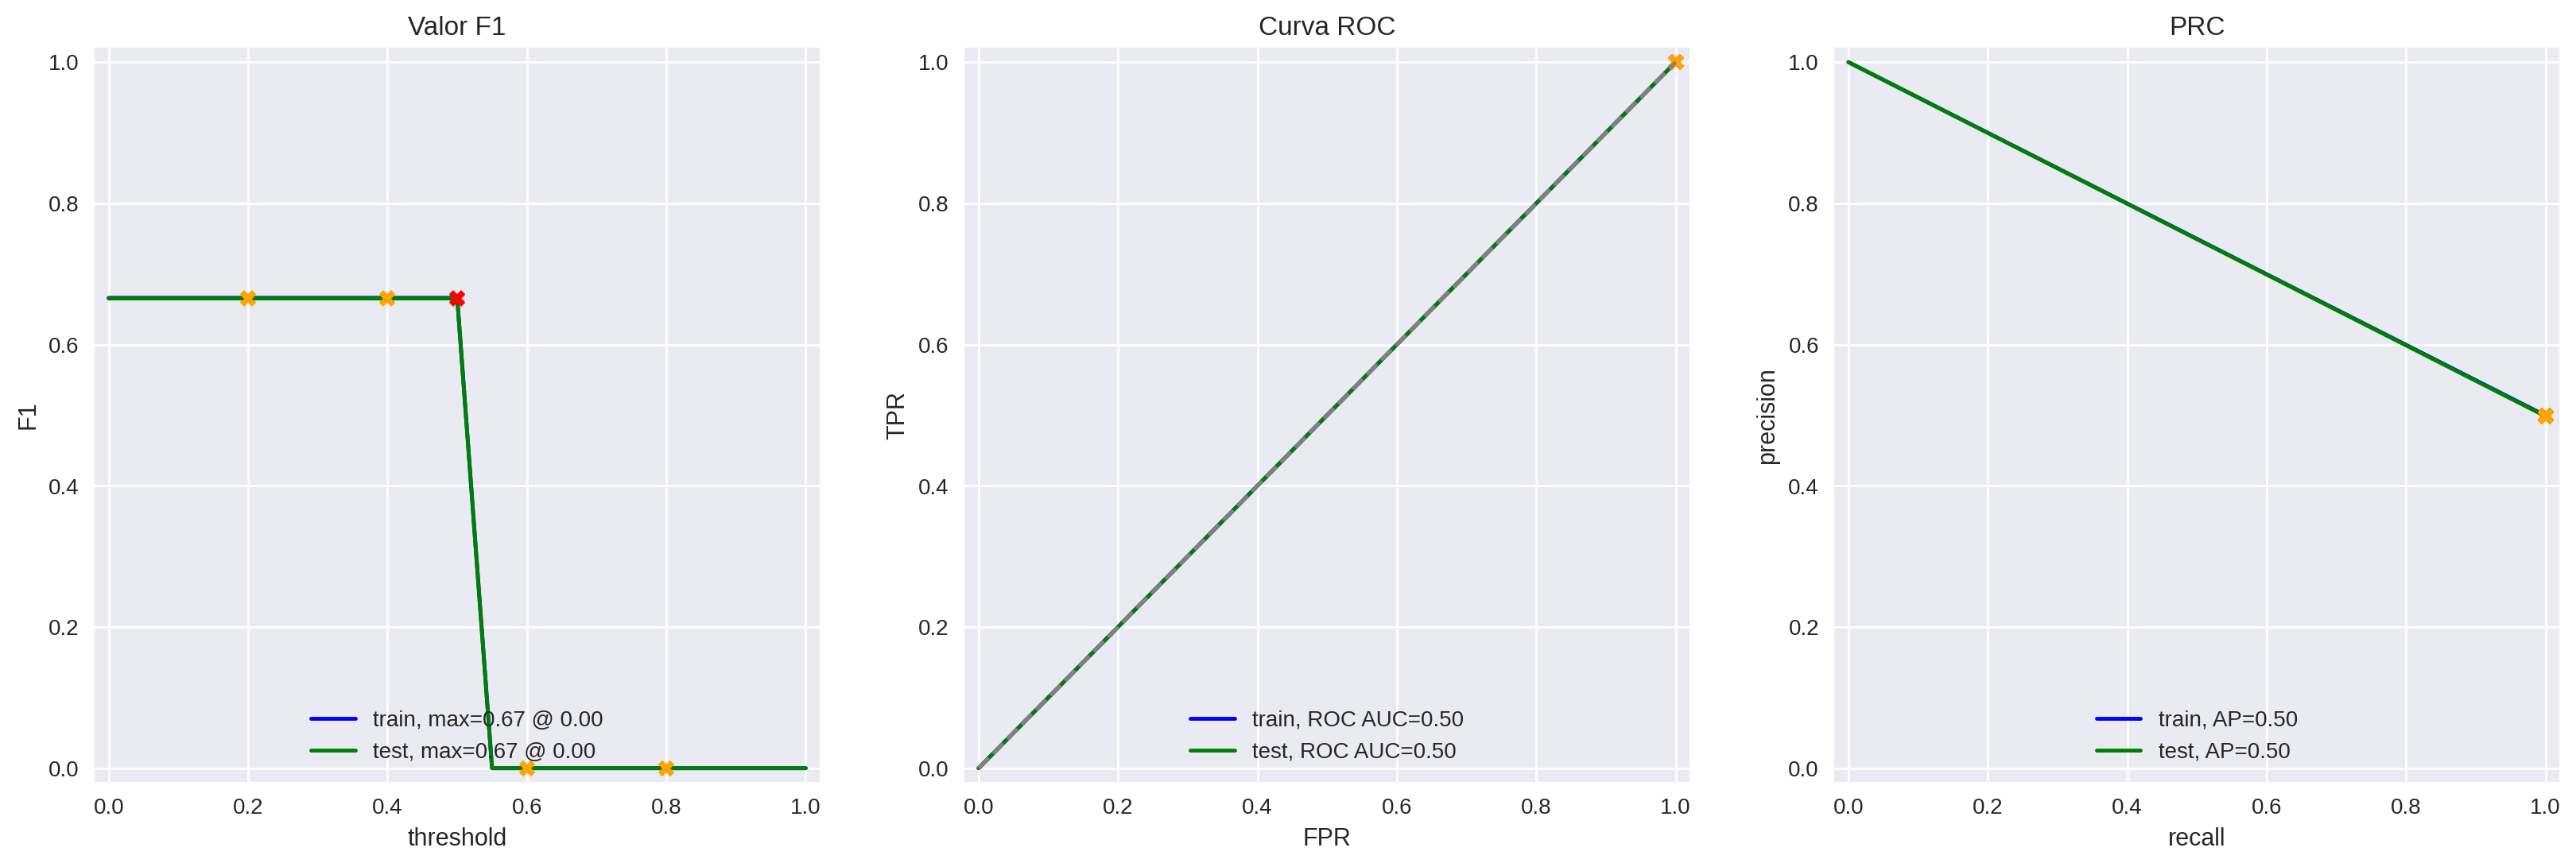

In [78]:
# Testando modelo Dummy
evaluate_model(dummy_model, train_features, train_target, test_features, test_target)

- O modelo Dummy mantém um *F1 Score* razoável de **0.67** para limiares abaixo de 0,5;
- Sua *Curva ROC* é aleatória (por ser um modelo aleatório) assim como seus valores APS, tanto para o conjunto de treinamento quanto ao de teste.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Para conhecimento, existem outras variações do DummyClassifier e que podem ser úteis em diferentes aplicações, como, por exemplo `most_frequent`.
<br>

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

</div>

### Modelo 1 - NLTK, TF-IDF e Regressão Logística

#### Passo 1: NLTK

In [79]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

nltk.data.path.append('/datasets')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
# Preparando os dados
train_corpus = train_features['review_norm']
test_corpus = test_features['review_norm']

In [81]:
# Tokenizando
tokens = [nltk.word_tokenize(review) for review in train_corpus]
tokens = [word for sublist in tokens for word in sublist]

In [82]:
# Lematizando
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [83]:
# Recompondo os textos
train_corpus = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(review)]) for review in train_corpus]
test_corpus = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(review)]) for review in test_corpus]

In [84]:
features_test.shape

(23796, 64299)

In [85]:
test_target.shape

(23535,)

In [88]:
len(test_corpus)

23535

In [87]:
# Definindo as Stopwords
stop_words = set(stopwords.words('english'))

#### Passo 2: TF-IDF

In [89]:
# Criando função para TF-IDF
def tfidf_preprocess(train_corpus, test_corpus, stop_words):
    # Criando vetorizador TF-IDF
    count_tf_idf = TfidfVectorizer(stop_words=stop_words)
    tf_idf = count_tf_idf.fit_transform(train_corpus)
    
    # Criando features tratadas
    features_train = tf_idf
    features_test = count_tf_idf.transform(test_corpus)
    
    return features_train, features_test

In [90]:
# Aplicando a função de TF-IDF
features_train, features_test = tfidf_preprocess(train_corpus, test_corpus, stop_words)

#### Passo 3: Regressão Logística

In [91]:
# Treinando modelo
lr_model = LogisticRegression().fit(features_train, train_target)

          train  test
Acurácia   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


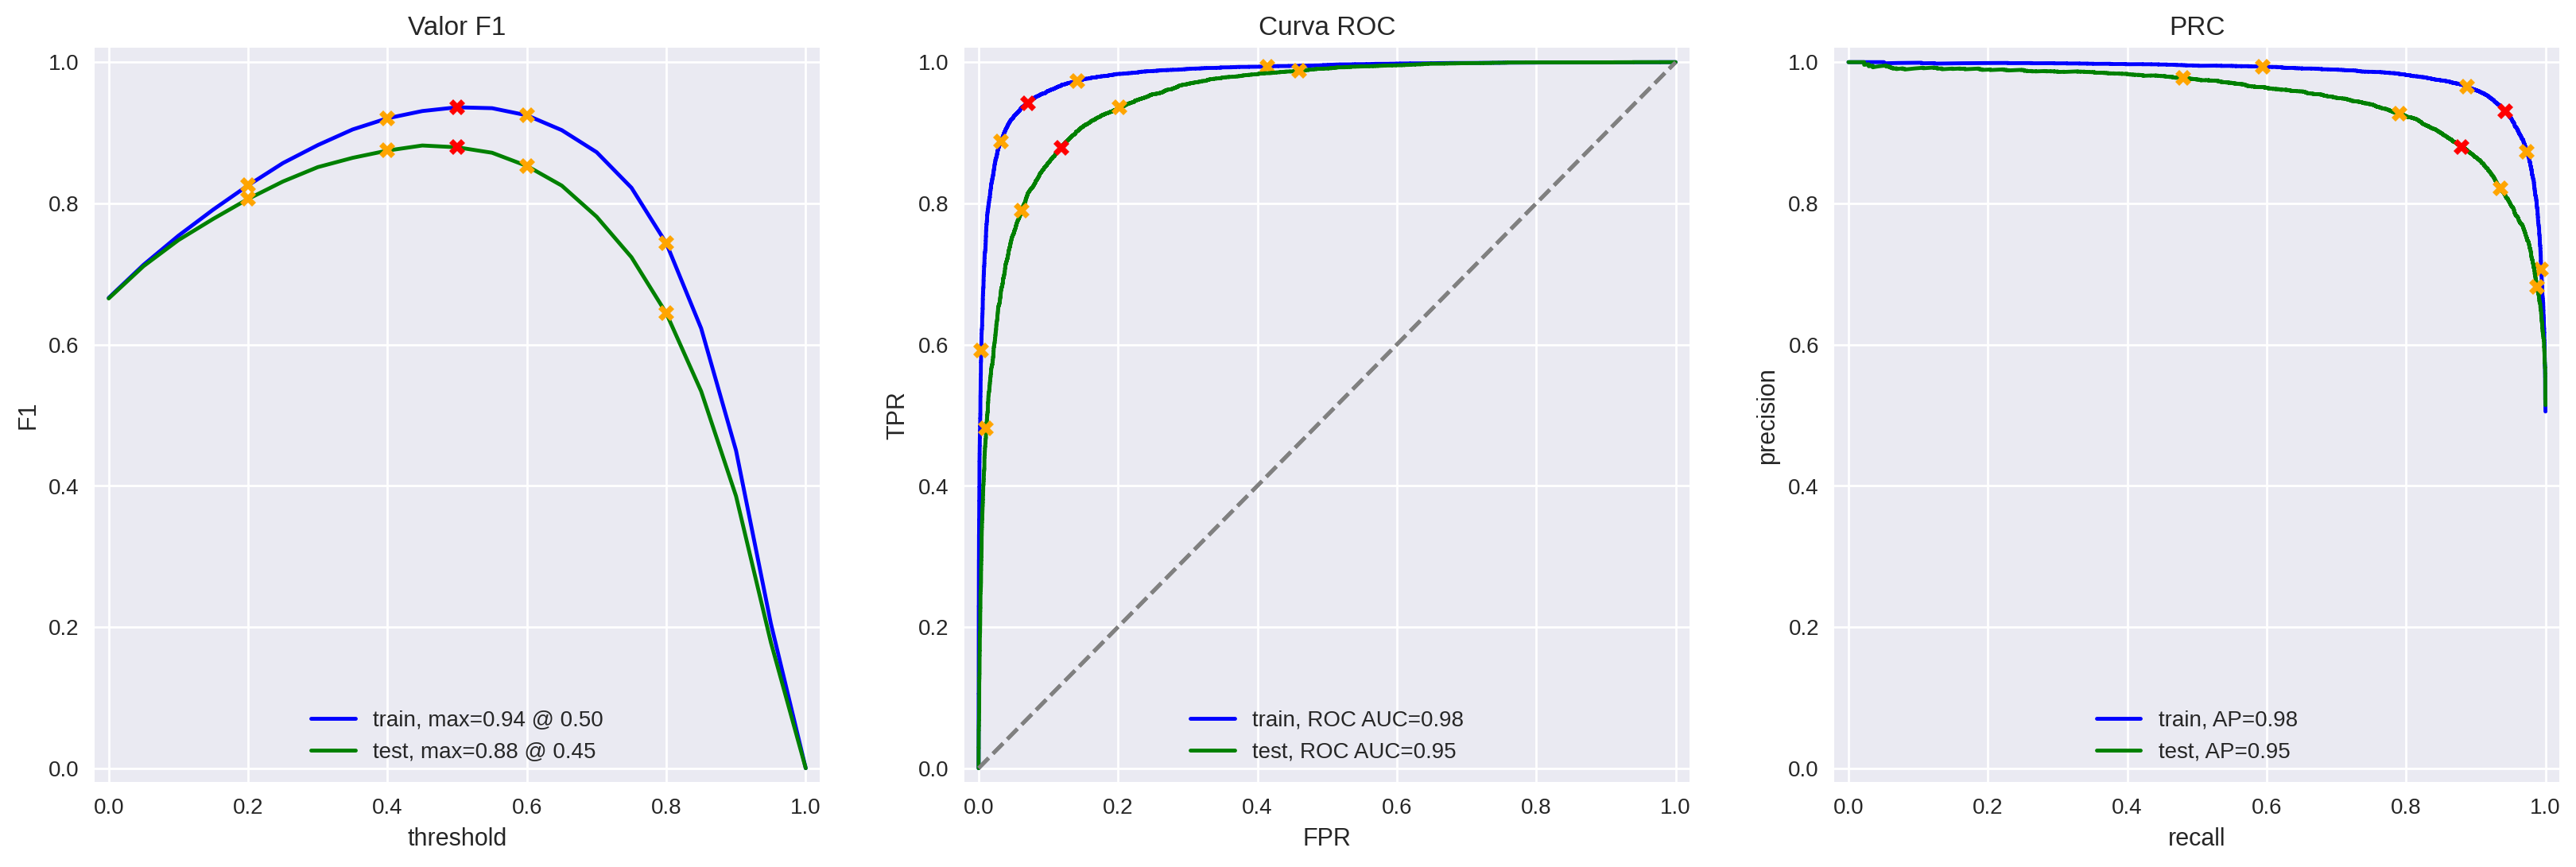

In [92]:
# Avaliando o modelo
evaluate_model(lr_model, features_train, train_target, features_test, test_target)

- Este modelo apresenta excelente desempenho tanto no conjunto de treino quanto no de teste;
- Os valores de *Acurácia e F1* (**0.88 no teste**) indicam boa performance na classificação e batem a meta desejada (de **0.85**);
- Os valores de *APS (Average Precision Score) e ROC AUC* (ambos **0.95 no teste**) mostram que ele lida bem com desequilíbrios e separa as classes com eficácia.
- Não há overfitting significativo.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante usou corretamente o vetorizador `TFIdf` e aplicou o pré-processamento de dados removendo `stopwords`. 
    
Como sugestão, você poderia explorar outras técnicas de pré-processamento de texto com o intuito de reduzir a dimensionalidade do seu conjunto de dados, como `stemming`, por exemplo, além de tirar proveito de stopwords de outras fontes de dados, como do pacote `Spacy`.

<br>
    
Referências: https://stackoverflow.com/questions/73078231/how-to-get-all-stop-words-from-spacy-and-dont-get-any-errors-typeerror-argume
</div>

### Modelo 2 - spaCy, TF-IDF e Regressão Logística

#### Passo 1: spaCy

In [31]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [32]:
def text_preprocessing_3(corpus):
    processed_tokens = []
    for doc in tqdm(nlp.pipe(corpus, batch_size=100, disable=['ner', 'parser'])):
        #tokens = [token.lemma_ for token in doc if not token.is_stop]
        tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
        processed_tokens.append(' '.join(tokens))
    
    return processed_tokens

In [129]:
# Preparando os dados
train_corpus = train_features['review_norm']
test_corpus = test_features['review_norm']

In [34]:
# Tokenizando e Lematizando
train_corpus_spacy = text_preprocessing_3(train_corpus)

0it [00:00, ?it/s]

In [131]:
test_corpus_spacy = text_preprocessing_3(test_corpus)

0it [00:00, ?it/s]

#### Passo 2: TF-IDF

In [132]:
# Aplicando a função de TF-IDF
features_train2, features_test2 = tfidf_preprocess(train_corpus_spacy, test_corpus_spacy, stop_words)

#### Passo 3: Regressão Logística

In [133]:
# Treinando modelo
lr_model2 = LogisticRegression().fit(features_train2, train_target)

          train  test
Acurácia   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


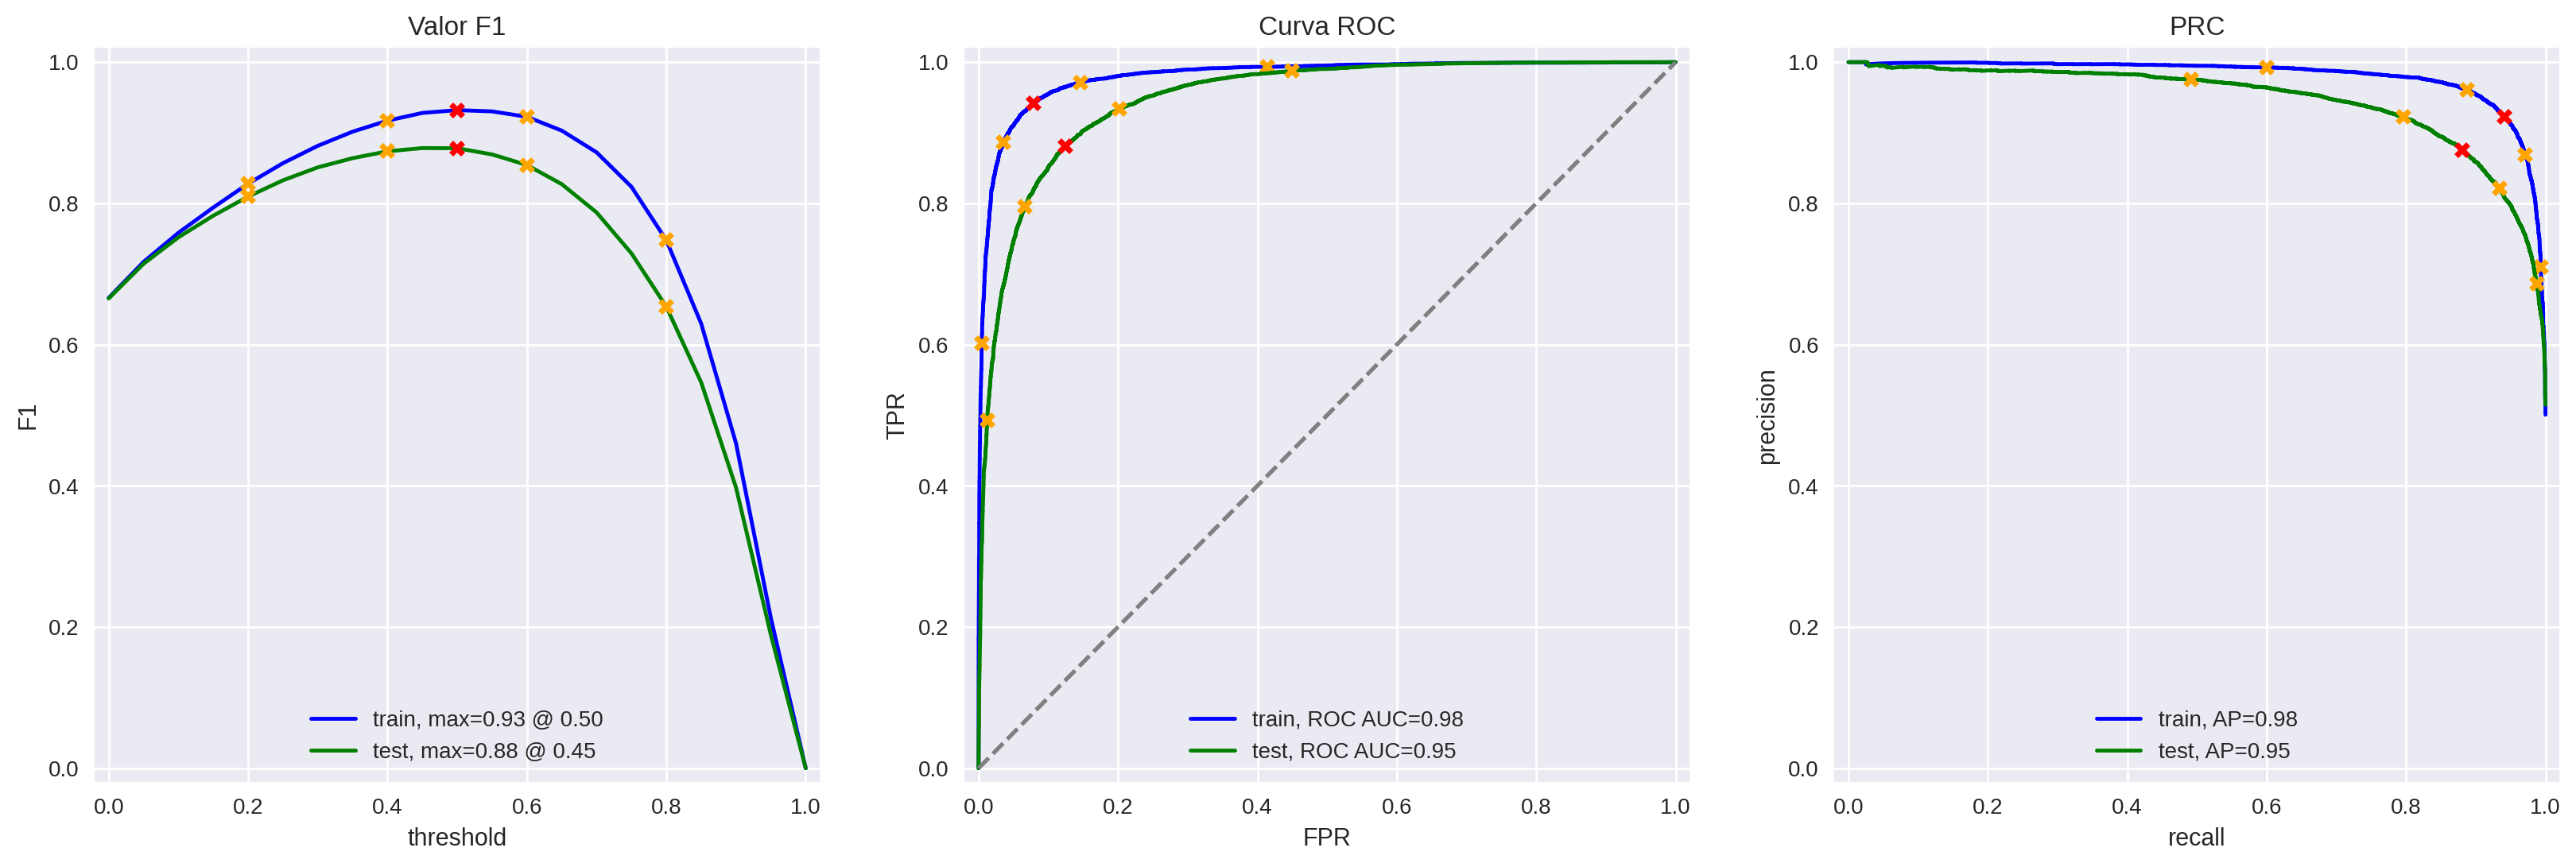

In [134]:
# Avaliando o modelo
evaluate_model(lr_model2, features_train2, train_target, features_test2, test_target)

- Este modelo apresenta desempenho similar ao anterior, mas é ligeiramente mais robusto como é possível ver no gráfico de *F1*.
- Os valores de *Acurácia e F1* (**0.88 no teste**) indicam boa performance na classificação e batem a meta desejada (de **0.85**);
- Os valores de *APS (Average Precision Score) e ROC AUC* (ambos **0.95 no teste**) mostram que ele lida bem com desequilíbrios e separa as classes com eficácia.
- Não há overfitting significativo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A segunda variação do modelo usando `spacy` foi treinada corretamente.
- As métricas foram calculadas corretamente
- O score mínimo de `0.85` de F1-score foi alcançado
    
</div>

### Modelo 3 - SpaCy, TF-IDF e LGBMClassifier

#### Passo 1: SpaCy

In [96]:
from lightgbm import LGBMClassifier

In [97]:
# Já temos os textos tokenizados e lematizados pelo SpaCy do item anterior:
train_corpus_spacy = train_corpus_spacy

#### Passo 2: TF-IDF

In [135]:
# Também já temos os tokens do SpaCy preprocessado por TF-IDF do item anterior:
features_train2 = features_train2
features_test2 = features_test2

#### Passo 3: LGBM Classifier

In [149]:
# Encontrando o melhor modelo de Gradient Boosting
best_f1 = 0
best_boosting_type = 'string'
best_num_leaves = 0
best_learning_rate = 0
best_n_estimators = 0

for bt in ['gbdt', 'dart']:
    for nl in range(10, 31, 20):
        for lr in [1, 0.1]:
            for est in range(100, 151, 50):
                lgb_model = LGBMClassifier(
                    boosting_type=bt,
                    num_leaves=nl,
                    learning_rate=lr,
                    n_estimators=est,
                    random_state=333,
                )
                lgb_model.fit(features_train2, train_target)
                preds = lgb_model.predict(features_test2)
                
                f1 = metrics.f1_score(test_target, preds)
                
                print(f'boosting_type={bt}, num_leaves={nl}, learning_rate={lr}, n_estimators={est}, F1={f1:.2f}')
                if f1 > best_f1:
                    best_f1 = f1
                    best_boosting_type = bt
                    best_num_leaves = nl
                    best_learning_rate = lr
                    best_n_estimators = est
                    
print(f'Taxa F1 do melhor modelo de Gradient Boosting: {best_f1:.2f}')
print('Hiperparâmetros:')
print(f'    boosting_type={best_boosting_type},')
print(f'    num_leaves={best_num_leaves},')
print(f'    learning_rate={best_learning_rate},')
print(f'    n_estimators={best_n_estimators}')

boosting_type=gbdt, num_leaves=10, learning_rate=1, n_estimators=100, F1=0.84
boosting_type=gbdt, num_leaves=10, learning_rate=1, n_estimators=150, F1=0.84
boosting_type=gbdt, num_leaves=10, learning_rate=0.1, n_estimators=100, F1=0.84
boosting_type=gbdt, num_leaves=10, learning_rate=0.1, n_estimators=150, F1=0.85
boosting_type=gbdt, num_leaves=30, learning_rate=1, n_estimators=100, F1=0.84
boosting_type=gbdt, num_leaves=30, learning_rate=1, n_estimators=150, F1=0.85
boosting_type=gbdt, num_leaves=30, learning_rate=0.1, n_estimators=100, F1=0.86
boosting_type=gbdt, num_leaves=30, learning_rate=0.1, n_estimators=150, F1=0.86
boosting_type=dart, num_leaves=10, learning_rate=1, n_estimators=100, F1=0.85
boosting_type=dart, num_leaves=10, learning_rate=1, n_estimators=150, F1=0.86
boosting_type=dart, num_leaves=10, learning_rate=0.1, n_estimators=100, F1=0.80
boosting_type=dart, num_leaves=10, learning_rate=0.1, n_estimators=150, F1=0.81
boosting_type=dart, num_leaves=30, learning_rate=1, 

In [136]:
# Treinando o modelo com os melhores hiperparâmetros
lgb_model = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=30,
    learning_rate=0.1,
    n_estimators=150,
    random_state=333
)
lgb_model.fit(features_train2, train_target)

LGBMClassifier(n_estimators=150, num_leaves=30, random_state=333)

          train  test
Acurácia   0.94  0.86
F1         0.94  0.86
APS        0.98  0.94
ROC AUC    0.99  0.94


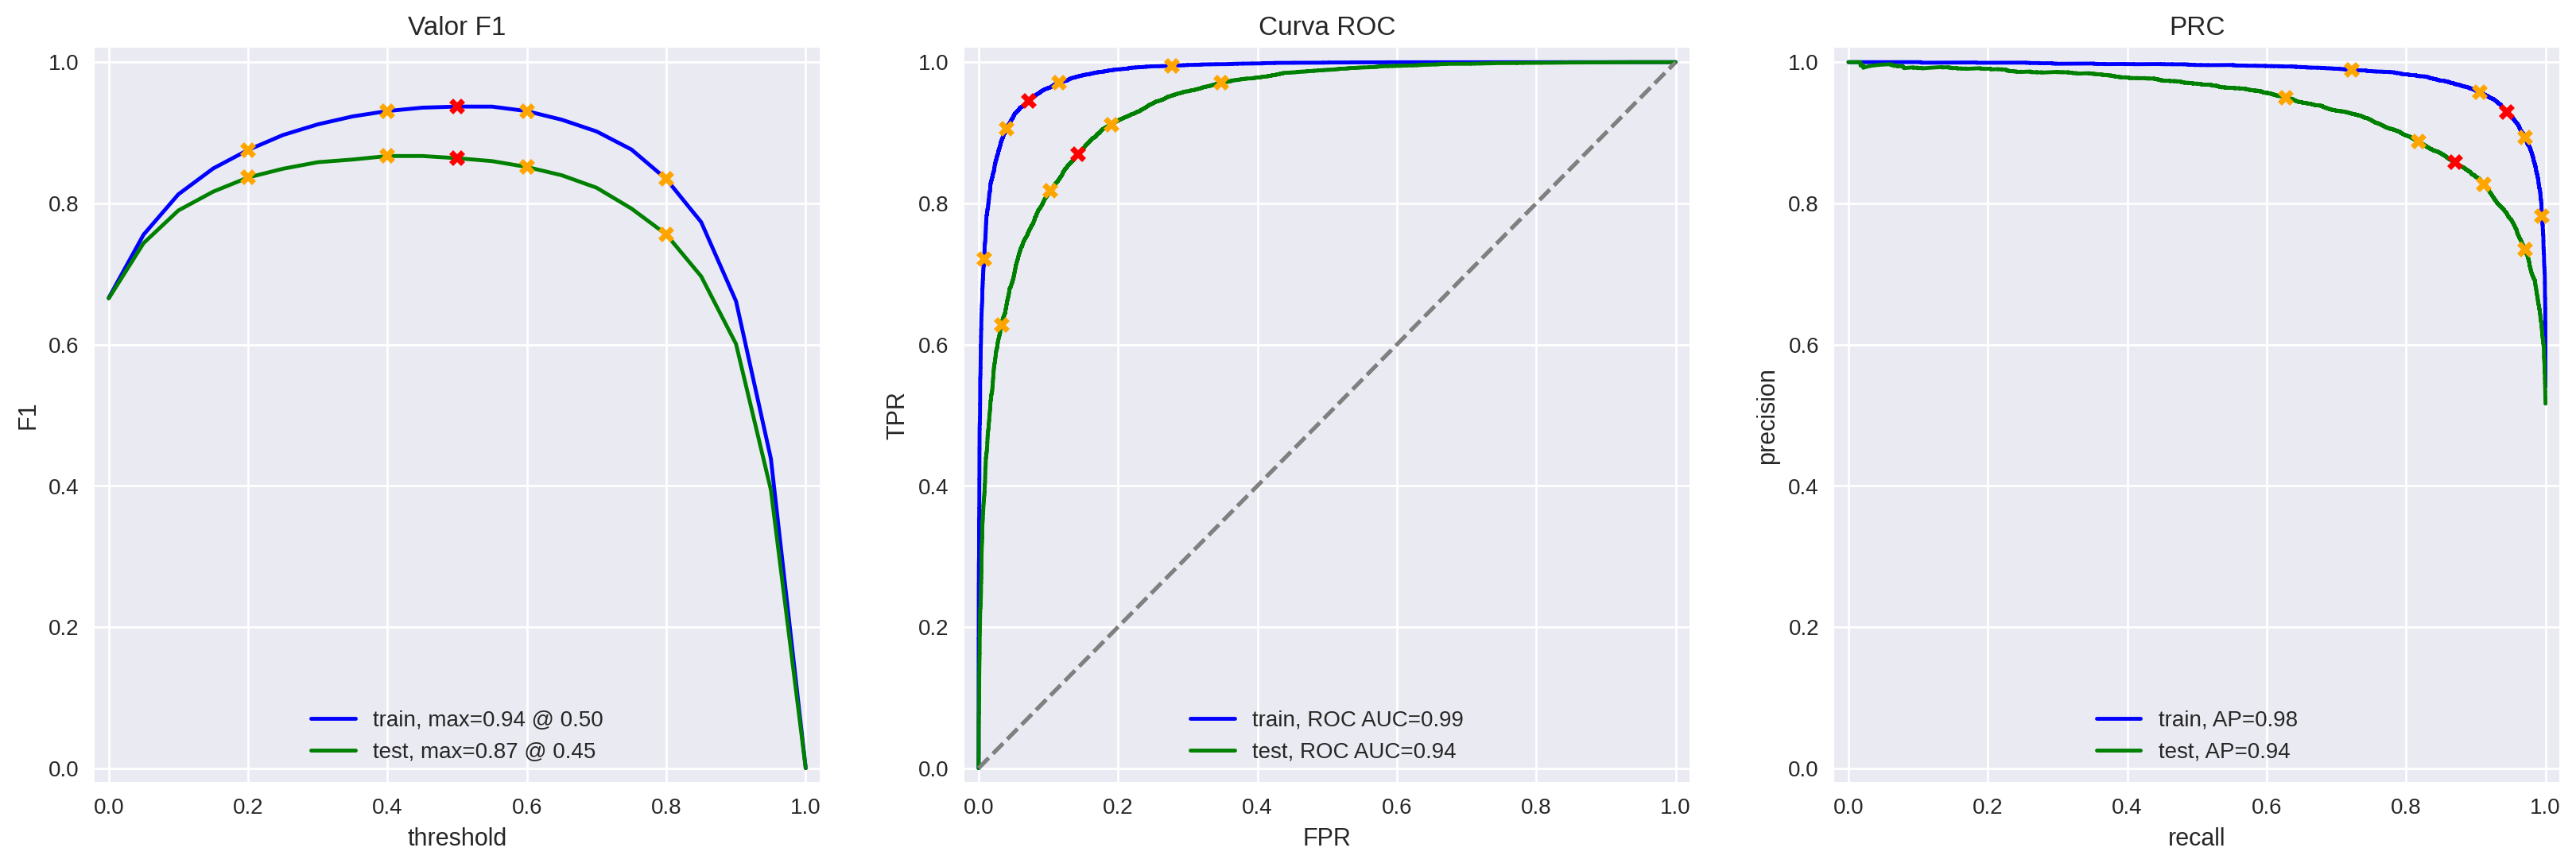

In [137]:
# Avaliando o modelo
evaluate_model(lgb_model, features_train2, train_target, features_test2, test_target)

- Este modelo apresenta desempenho em geral ligeiramente inferior a todos os outros já testados, porém também apresenta mais robustez para diferentes limiares de F1, o que deve ser levado em consideração, ainda mais em modelos textuais;
- Os valores de *Acurácia e F1* (**0.86 no teste**) indicam boa performance na classificação e batem o limite da meta desejada (de **0.85**);
- Os valores de *APS (Average Precision Score) e ROC AUC* (ambos **0.94 no teste**) mostram que ele lida bem com desequilíbrios e separa as classes com eficácia.
- Não há overfitting significativo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A tercenira variação do modelo usando `spacy` e `LGBM` foi treinada corretamente.
- As métricas foram calculadas corretamente
- O score mínimo de `0.85` de F1-score foi alcançado
    
</div>

###  Modelo 4 - BERT

In [101]:
import torch
import transformers

In [102]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [103]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # texto para IDs de tokens preenchidos com suas máscaras de atenção
    
    # <coloque seu código aqui para criar ids_list e attention_mask_list>
    for text in texts:
        encoded = tokenizer(text, truncation=True, padding='max_length', max_length=max_length, return_tensors='pt')
        ids_list.append(encoded['input_ids'].squeeze().tolist())
        attention_mask_list.append(encoded['attention_mask'].squeeze().tolist())
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Usando o dispositivo {device}.')
    
    # recebendo incorporações em lotes

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <coloque seu código aqui para criar attention_mask_batch
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [106]:
# Atenção! A execução do BERT para milhares de textos pode levar muito tempo na CPU, pelo menos várias horas
train_features_bert = BERT_text_to_embeddings(train_corpus.head(25))

Usando o dispositivo cpu.


  0%|          | 0/1 [00:00<?, ?it/s]

In [107]:
# Gerando test features com BERT
test_features_bert = BERT_text_to_embeddings(test_corpus.head(25))

Usando o dispositivo cpu.


  0%|          | 0/1 [00:00<?, ?it/s]

In [108]:
print(f'train corpus: {train_corpus.shape}')
print(f'train features bert: {train_features_bert.shape}')
print(f'train target: {train_target.shape}')

train corpus: (23796,)
train features bert: (25, 768)
train target: (23796,)


#### Passo 2: Regressão Logística

Irei testar a amostra de BERT com um modelo de Regressão Logística por ser o modelo mais leve e veloz.

In [109]:
# Treinando modelo
BERTlr_model = LogisticRegression().fit(train_features_bert, train_target.head(25))

          train  test
Acurácia    1.0  0.68
F1          1.0  0.33
APS         1.0  0.59
ROC AUC     1.0  0.66


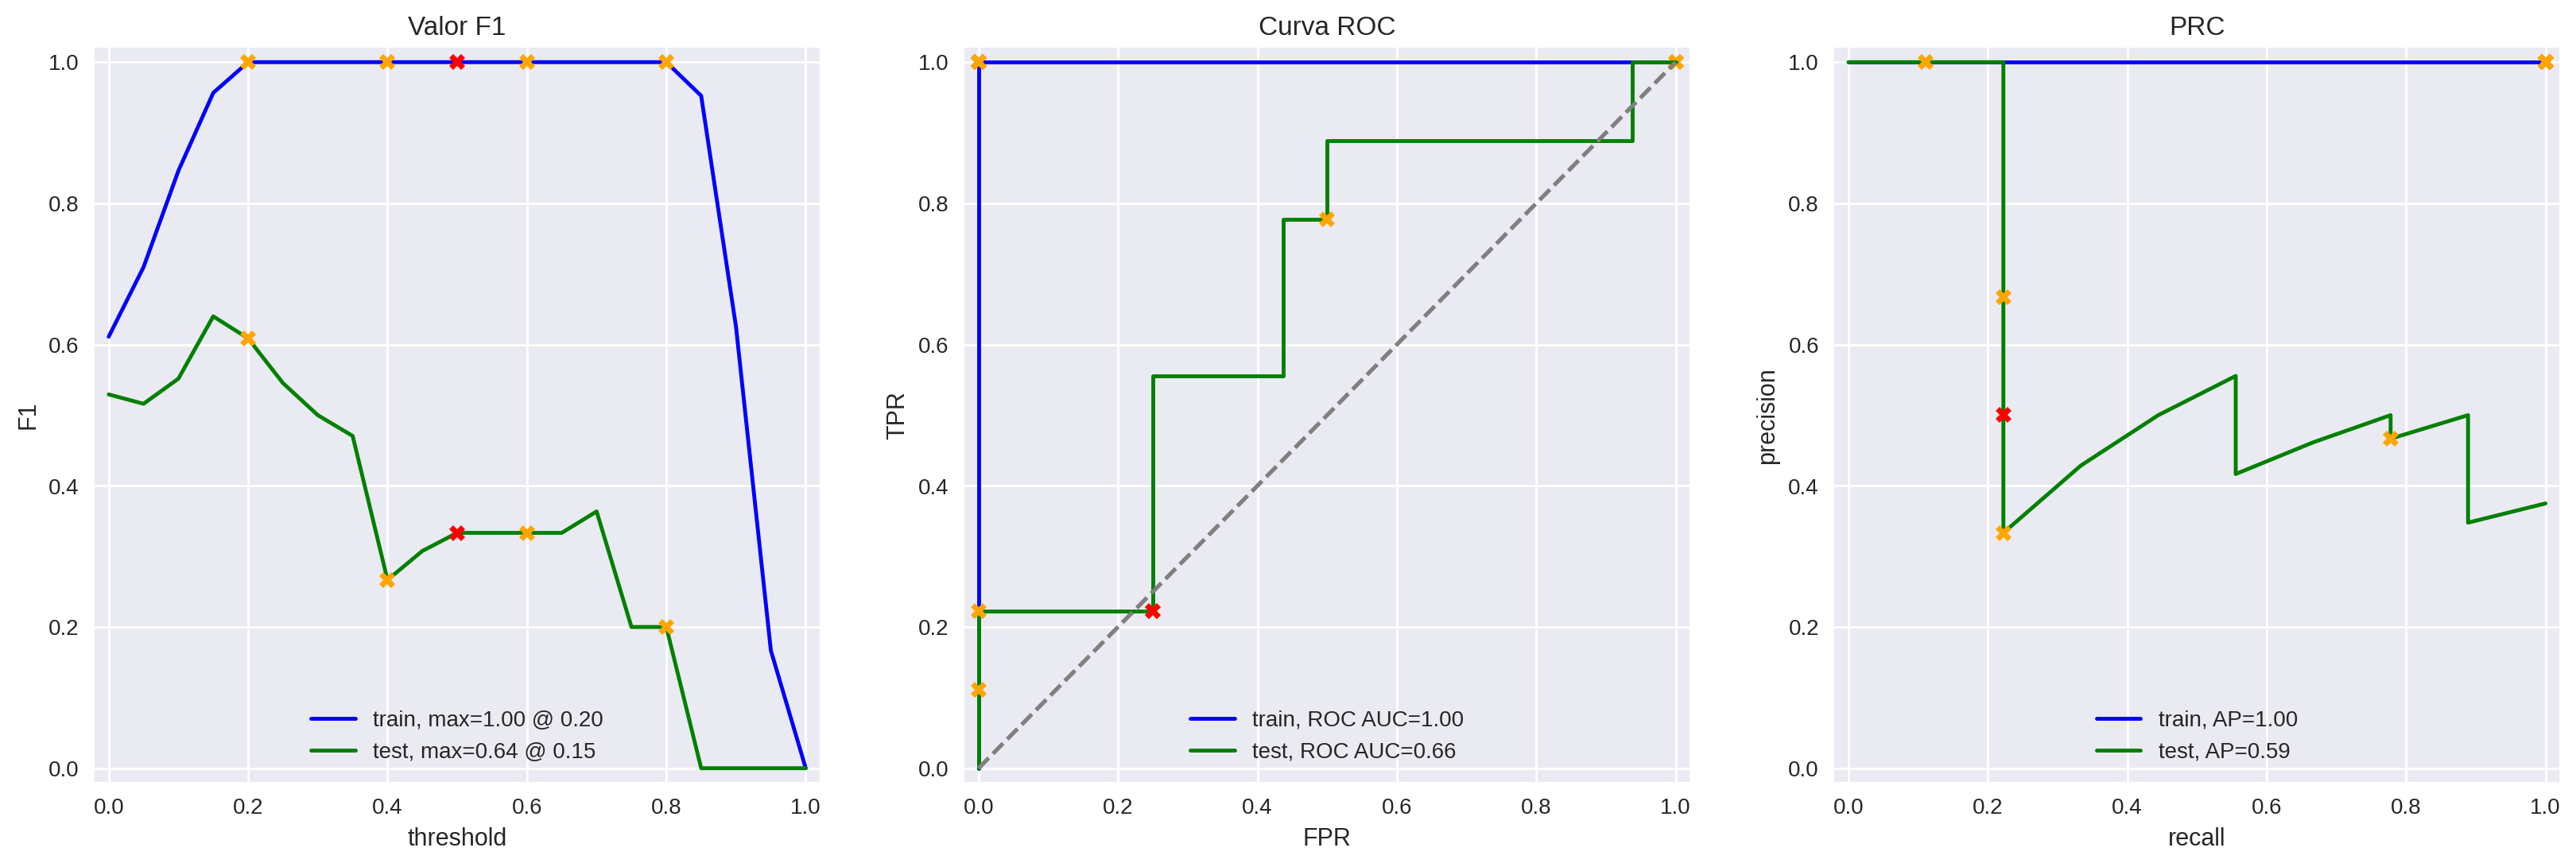

In [110]:
# Avaliando o modelo
evaluate_model(BERTlr_model, train_features_bert, train_target.head(25), test_features_bert, test_target.head(25))

In [111]:
# se você tiver as incorporações, é aconselhável salvá-las para tê-las prontas se 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# e carregar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

- O modelo treinado com BERT obteve métricas completamente irregulares por conta de limitações computacionais, o que possibilitou o treinamento com apenas 25 amostras. Utilizando uma máquina com melhor setup de hardware será possível treinar modelos melhores com BERT.

## Minhas Resenhas

In [120]:
# sinta-se à vontade para remover completamente essas resenhas e experimentar seus modelos nas suas próprias resenhas, as abaixo são apenas exemplos

my_reviews = pd.DataFrame([
    "Incredible!",
    "I can't say if I liked it or not, I thought it was strange.",
    "I just didn't like it, it's not my kind of film.",
    'Well, I got bored and fell asleep halfway through the movie.',
    'I was really fascinated by the film',    
    'The viewers were very old and disinterested, and yet they were paid to be in the film. Who stole money without shame.',
    "I didn't expect the new version to be so good! The writers really cared about the source material",
    "The film has its pros and cons, but I feel overall it's a decent film. I can imagine going to watch it again.",
    "What an attempt at comedy this may be. Not a single joke lands, everyone was so annoying and loud, even children won't like it!",
    "Launching on Netflix was a joyful move and I really appreciate being able to watch episode after episode of this exciting and smart new drama."
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: re.sub(r"[^a-zA-Z']", ' ', x).lower()) # <coloque aqui a mesma lógica de normalização do conjunto de dados principal>

my_reviews

,review,review_norm
0,Incredible!,incredible
1,"I can't say if I liked it or not, I thought it...",i can't say if i liked it or not i thought it...
2,"I just didn't like it, it's not my kind of film.",i just didn't like it it's not my kind of film
3,"Well, I got bored and fell asleep halfway thro...",well i got bored and fell asleep halfway thro...
4,I was really fascinated by the film,i was really fascinated by the film
5,"The viewers were very old and disinterested, a...",the viewers were very old and disinterested a...
6,I didn't expect the new version to be so good!...,i didn't expect the new version to be so good ...
7,"The film has its pros and cons, but I feel ove...",the film has its pros and cons but i feel ove...
8,What an attempt at comedy this may be. Not a s...,what an attempt at comedy this may be not a s...
9,Launching on Netflix was a joyful move and I r...,launching on netflix was a joyful move and i r...


### Modelo 0 - Constante

In [125]:
texts = my_reviews['review_norm']

In [126]:
my_reviews_pred_prob = dummy_model.predict_proba(texts)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i, 1]:.2f}:  {review}')

0.50:  incredible 
0.50:  i can't say if i liked it or not  i thought it was strange 
0.50:  i just didn't like it  it's not my kind of film 
0.50:  well  i got bored and fell asleep halfway through the movie 
0.50:  i was really fascinated by the film
0.50:  the viewers were very old and disinterested  and yet they were paid to be in the film  who stole mon
0.50:  i didn't expect the new version to be so good  the writers really cared about the source material
0.50:  the film has its pros and cons  but i feel overall it's a decent film  i can imagine going to watch 
0.50:  what an attempt at comedy this may be  not a single joke lands  everyone was so annoying and loud  e
0.50:  launching on netflix was a joyful move and i really appreciate being able to watch episode after epi


- O modelo Dummy segue como configurado, com 50% de chances independente do que está escrito.

### Modelo 1 - NLTK, TF-IDF e Regressão Logística

In [127]:
# Recompondo os textos
train_corpus_nltk = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(review)]) for review in train_corpus]
new_test_corpus_nltk = [" ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(review)]) for review in texts]

In [128]:
new_train_features, new_test_features = tfidf_preprocess(train_corpus_nltk, new_test_corpus_nltk, stop_words)
my_reviews_pred_prob = lr_model.predict_proba(new_test_features)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i, 1]:.2f}:  {review}')

0.90:  incredible 
0.78:  i can't say if i liked it or not  i thought it was strange 
0.36:  i just didn't like it  it's not my kind of film 
0.21:  well  i got bored and fell asleep halfway through the movie 
0.52:  i was really fascinated by the film
0.23:  the viewers were very old and disinterested  and yet they were paid to be in the film  who stole mon
0.30:  i didn't expect the new version to be so good  the writers really cared about the source material
0.66:  the film has its pros and cons  but i feel overall it's a decent film  i can imagine going to watch 
0.06:  what an attempt at comedy this may be  not a single joke lands  everyone was so annoying and loud  e
0.87:  launching on netflix was a joyful move and i really appreciate being able to watch episode after epi


- Este primeiro modelo interpretou uma dúvida como uma crítica super favorável *(review 2)*, não sei se eu daria uma probabilidade tão alta de review positiva para este texto;
- Ele não interpretou bem a palavra *'fascinated' (fascinado)*, colocou 52% de chance de ser uma crítica favorável quando na verdade é a melhor de todas as críticas da lista.
- Errou a interpretação da *review 7*, esta é uma boa review.

### Modelo 2 - spaCy, TF-IDF e Regressão Logística

In [138]:
# Já temos os textos de treino tokenizados e lematizados pelo SpaCy do item anterior:
train_corpus_spacy = train_corpus_spacy

In [139]:
# Tokenizando e Lematizando o teste
texts_corpus_spacy = text_preprocessing_3(texts)

0it [00:00, ?it/s]

In [141]:
new_train_features2, new_test_features2 = tfidf_preprocess(train_corpus_spacy, texts_corpus_spacy, stop_words)
my_reviews_pred_prob = lr_model2.predict_proba(new_test_features2)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i, 1]:.2f}:  {review}')

0.90:  incredible 
0.58:  i can't say if i liked it or not  i thought it was strange 
0.43:  i just didn't like it  it's not my kind of film 
0.11:  well  i got bored and fell asleep halfway through the movie 
0.63:  i was really fascinated by the film
0.24:  the viewers were very old and disinterested  and yet they were paid to be in the film  who stole mon
0.25:  i didn't expect the new version to be so good  the writers really cared about the source material
0.50:  the film has its pros and cons  but i feel overall it's a decent film  i can imagine going to watch 
0.07:  what an attempt at comedy this may be  not a single joke lands  everyone was so annoying and loud  e
0.91:  launching on netflix was a joyful move and i really appreciate being able to watch episode after epi


- Este modelo já interpretou melhor o texto em dúvida *(review 2)*, com 58% de chances de ser positiva;
- Também interpretou melhor a palavra *'fascinated' (fascinado)*, dando 63% de chances de ser positiva;
- Também errou na interpretação da *review 7*...
- As probabilidades em geral deste modelo são mais compatíveis com os textos do que as do modelo anterior.

### Modelo 3 - SpaCy, TF-IDF e LGBMClassifier

In [142]:
# Já temos os textos de treino tokenizados e lematizados pelo SpaCy do item anterior:
train_corpus_spacy = train_corpus_spacy
texts_corpus_spacy = texts_corpus_spacy

In [144]:
# Também já temos os lemmas tratados com TF-IDF
new_train_features2, new_test_features2 = new_train_features2, new_test_features2

In [145]:
my_reviews_pred_prob = lgb_model.predict_proba(new_test_features2)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i, 1]:.2f}:  {review}')

0.73:  incredible 
0.63:  i can't say if i liked it or not  i thought it was strange 
0.61:  i just didn't like it  it's not my kind of film 
0.31:  well  i got bored and fell asleep halfway through the movie 
0.62:  i was really fascinated by the film
0.44:  the viewers were very old and disinterested  and yet they were paid to be in the film  who stole mon
0.57:  i didn't expect the new version to be so good  the writers really cared about the source material
0.63:  the film has its pros and cons  but i feel overall it's a decent film  i can imagine going to watch 
0.27:  what an attempt at comedy this may be  not a single joke lands  everyone was so annoying and loud  e
0.83:  launching on netflix was a joyful move and i really appreciate being able to watch episode after epi


- Este é o único modelo (até agora) a acertar **todas** as previsões das reviews, apesar dos níveis de intensidade das probabilidades serem mais brandos, realiza a tarefa classificativa melhor do que os 2 anteriores.
- É possível ver na prática a robustez do modelo sendo aplicada na *review 7*, que confundiu os modelos anteriores, mas foi corretamente classificada por este, mesmo que com uma probabilidade relativamente baixa à realidade.

###  Modelo 4 - BERT

In [146]:
# Já temos as train features tratadas com BERT
train_features_bert = train_features_bert

In [147]:
# Gerando text features com BERT
text_features_bert = BERT_text_to_embeddings(texts)

Usando o dispositivo cpu.


  0%|          | 0/1 [00:00<?, ?it/s]

In [148]:
my_reviews_pred_prob = BERTlr_model.predict_proba(text_features_bert)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i, 1]:.2f}:  {review}')

0.11:  incredible 
0.07:  i can't say if i liked it or not  i thought it was strange 
0.04:  i just didn't like it  it's not my kind of film 
0.02:  well  i got bored and fell asleep halfway through the movie 
0.08:  i was really fascinated by the film
0.21:  the viewers were very old and disinterested  and yet they were paid to be in the film  who stole mon
0.05:  i didn't expect the new version to be so good  the writers really cared about the source material
0.13:  the film has its pros and cons  but i feel overall it's a decent film  i can imagine going to watch 
0.09:  what an attempt at comedy this may be  not a single joke lands  everyone was so annoying and loud  e
0.13:  launching on netflix was a joyful move and i really appreciate being able to watch episode after epi


- Como era de se esperar, as previsões com o modelo BERT foram péssimas, pois a capacidade computacional que tenho hoje permitiu treinar o modelo com apenas 25 textos, é muito importante o treinamento com o maior número de amostras possível, principalmente das mais variadas,

## Conclusões

### Objetivo Alcançado:

- Foi desenvolvido um modelo para classificar automaticamente resenhas de filmes como positivas ou negativas.
- O objetivo de atingir um **F1 Score mínimo de 0.85** foi alcançado e superado com os modelos baseados em Regressão Logística e Gradient Boosting.

### Principais Descobertas da Análise Exploratória:

- A distribuição das resenhas é **balanceada**, com 49,9% positivas e 50,1% negativas.
- O número de filmes e resenhas aumentou significativamente após 1990, mas a média de resenhas por filme permaneceu estável.

### Modelos Treinados:

- **Dummy Classifier:** F1 Score de 0.67, servindo como baseline.
- **Regressão Logística com TF-IDF (NLTK e spaCy):**
    Acurácia e F1 Score de 0.88 no conjunto de teste.
    APS e ROC AUC de 0.95, indicando excelente separação de classes.
    Sem sinais de overfitting.
- **LGBM Classifier com TF-IDF (spaCy):**
    Apresentou resultados similares à Regressão Logística, mas com ligeira vantagem em limiares específicos de F1 e maior flexibilidade em lidar com características não-lineares.

### Comparação de Modelos:

- A **Regressão Logística** apresentou melhor desempenho, destacando-se pela simplicidade e eficiência.
- O modelo com **Gradient Boosting (LGBM)** demonstrou ser uma opção mais sofisticada e robusta, com ganhos marginais em relação à Regressão Logística mas que podem decisivos em textos mais dúbios.

### Impacto e Implicações:

- O sistema proposto permite à Film Junky Union categorizar resenhas de forma eficiente e confiável.
- A capacidade de detectar automaticamente resenhas negativas pode melhorar a experiência dos usuários, facilitando a curadoria de conteúdo.

### Próximos Passos:

- Melhorar a capacidade computacional para explorar técnicas de embedding avançadas (ex.: Word2Vec, BERT) para melhorar a representação textual.
- Implementar o modelo em produção com monitoramento de desempenho contínuo para ajustes futuros.

### Modelo recomendado:

- Por conta da robustez recomendo o modelo de **Gradient Boosting (LGBM)** com tratamento de texto mais certeiro para linguagem colquial em *NLTK e SpaCy*.


- **Configurações do modelo:**

```
lgb_model = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=30,
    learning_rate=0.1,
    n_estimators=150,
    random_state=333
)
```

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os modelos treinados foram testados em novos exemplos de dados
- A conclusão final foi apresentada
    
</div>

# Checklist

- [x]  O caderno foi aberto
- [x]  Os dados de texto são carregados e pré-processados para vetorização
- [x]  Os dados de texto são transformados em vetores
- [x]  Os modelos são treinados e testados
- [x]  O limiar da métrica foi atingido
- [x]  Todas as células de código estão organizadas na ordem de sua execução
- [x]  Todas as células de código podem ser executadas sem erros
- [x]  Há conclusões 